In [3]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)

In [4]:
train_input.shape, test_input.shape

((25000,), (25000,))

In [5]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [6]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

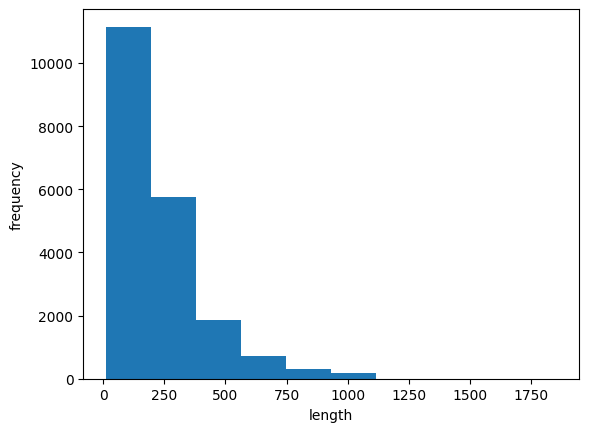

In [7]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [9]:
train_seq.shape

(20000, 100)

In [10]:
train_seq[0]

array([ 10,   4,  20,   9,   2,   2,   2,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
         2,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10,   2, 158], dtype=int32)

In [11]:
train_input[0][-10:]

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]

In [12]:
train_input[0][-10:]

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]

In [13]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2,   2,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94,   2,   2,   2,   2,  11, 190,  24,   2,   2,   7,  94, 205,
         2,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

In [15]:
val_seq = pad_sequences(val_input, maxlen=100)

In [16]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
train_oh = keras.utils.to_categorical(train_seq)

In [18]:
train_oh.shape

(20000, 100, 300)

In [19]:
train_oh[0][0][:12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [20]:
np.sum(train_oh[0][0])

1.0

In [21]:
val_oh = keras.utils.to_categorical(val_seq)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 28s 80ms/step - loss: 0.6998 - accuracy: 0.5049 - val_loss: 0.6966 - val_accuracy: 0.5034
Epoch 2/100
  2/313 [..............................] - ETA: 17s - loss: 0.7077 - accuracy: 0.4844

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 30s 95ms/step - loss: 0.6945 - accuracy: 0.5109 - val_loss: 0.6946 - val_accuracy: 0.5056
Epoch 3/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6930 - accuracy: 0.5144 - val_loss: 0.6936 - val_accuracy: 0.5072
Epoch 4/100
313/313 [==============================] - 23s 72ms/step - loss: 0.6921 - accuracy: 0.5174 - val_loss: 0.6930 - val_accuracy: 0.5104
Epoch 5/100
313/313 [==============================] - 22s 71ms/step - loss: 0.6913 - accuracy: 0.5214 - val_loss: 0.6924 - val_accuracy: 0.5172
Epoch 6/100
313/313 [==============================] - 23s 72ms/step - loss: 0.6907 - accuracy: 0.5263 - val_loss: 0.6921 - val_accuracy: 0.5142
Epoch 7/100
313/313 [==============================] - 22s 71ms/step - loss: 0.6900 - accuracy: 0.5311 - val_loss: 0.6916 - val_accuracy: 0.5186
Epoch 8/100
313/313 [==============================] - 22s 71ms/step - loss: 0.6893 - accuracy: 0.5343 - val_loss: 0.6913 - val_accuracy: 0.52

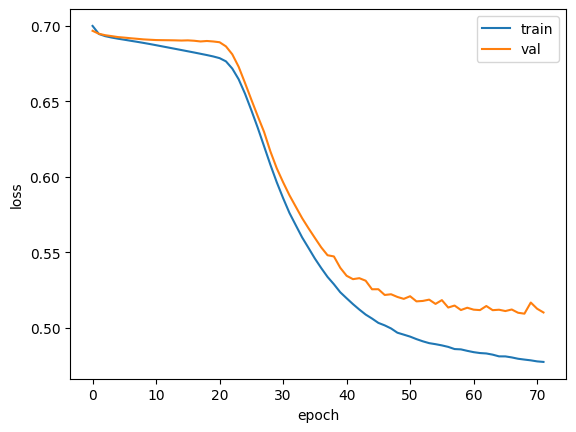

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [25]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=20, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
313/313 [==============================] - 30s 94ms/step - loss: 0.5255 - accuracy: 0.7539 - val_loss: 0.5387 - val_accuracy: 0.7372
Epoch 2/20
313/313 [==============================] - 28s 91ms/step - loss: 0.5214 - accuracy: 0.7559 - val_loss: 0.5358 - val_accuracy: 0.7420
Epoch 3/20
313/313 [==============================] - 28s 89ms/step - loss: 0.5201 - accuracy: 0.7573 - val_loss: 0.5331 - val_accuracy: 0.7414
Epoch 4/20
313/313 [==============================] - 27s 87ms/step - loss: 0.5174 - accuracy: 0.7600 - val_loss: 0.5316 - val_accuracy: 0.7412
Epoch 5/20
313/313 [==============================] - 28s 90ms/step - loss: 0.5152 - accuracy: 0.7615 - val_loss: 0.5302 - val_accuracy: 0.7446
Epoch 6/20
313/313 [==============================] - 30s 95ms/step - loss: 0.5143 - accuracy: 0.7610 - val_loss: 0.5325 - val_accuracy: 0.7394
Epoch 7/20
313/313 [==============================] - 28s 90ms/step - loss: 0.5115 - accuracy: 0.7643 - val_loss: 0.5269 - val_accuracy:

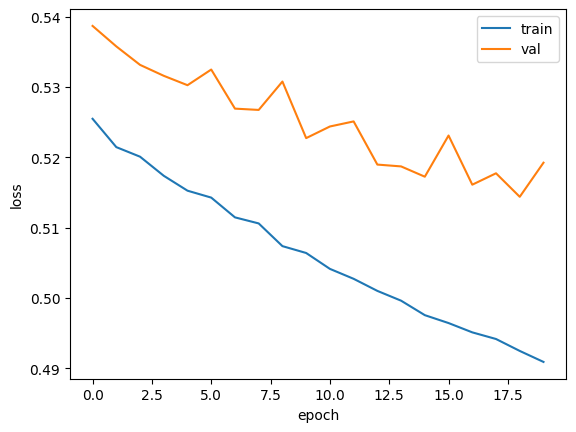

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()